In [1]:
#load csv file
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import numpy as np
from itertools import count
import random
from matplotlib.animation import FuncAnimation
from scipy.signal import butter, lfilter

In [74]:
#load csv file from Processed folder
df = []
const = 16 # 4 if redflag, 16 if Trj
bias = 0 # 1 if redflag, 0 if Trj
csvpath = os.path.join(os.getcwd(), 'Processed','Trj20240506T2121.csv')
with open(csvpath, 'r',newline='') as file:
    for line in file:
        row = line.strip().split(',')
        rowf = [float(element) for element in row]
        rowf = [0 if math.isnan(x) else x for x in rowf]
        df.append(rowf)


In [28]:
from shapely.geometry import Point, Polygon
def zonefinder(BBx,BBy, Zones):
    for i, zone in enumerate(Zones):
        Poly = Polygon(zone)
        if Poly.contains(Point(BBx, BBy)):
            return i
    return 100

In [1]:
import torch
a = torch.tensor([1,2,3,4,5,6,7,8,9,10])

a[5:-1]

tensor([6, 7, 8, 9])

In [29]:
import yaml
import re
ZoneConf = []
with open('utilz/ZoneConf.yaml') as file:
    ZonesYML = yaml.load(file, Loader=yaml.FullLoader)
    #convert the string values to float
    for _, v in ZonesYML.items():
        lst = []
        for _, p  in v.items():    
            for x in p[0]:
                b = re.split(r'[,()]',p[0][x])
                lst.append((float(b[1]), float(b[2])))
        ZoneConf.append(lst)


In [58]:
def Move(zn):
    movement = np.zeros((5,1))
    i = 0
    for n, inx in enumerate(zn[1:]):
        if inx != zn[n]:
            movement[inx] = 1
            movement[zn[n]] = 1
            i += 1
            print("moved")
    return i

In [59]:
ZoneConf = []
with open('utilz/ZoneConf.yaml') as file:
    ZonesYML = yaml.load(file, Loader=yaml.FullLoader)
    #convert the string values to float
    for _, v in ZonesYML.items():
        lst = []
        for _, p  in v.items():    
            for x in p[0]:
                b = re.split(r'[,()]',p[0][x])
                lst.append((float(b[1]), float(b[2])))
        ZoneConf.append(lst)

In [60]:
for i, zone in enumerate(ZoneConf):
    print(i)

0
1
2
3
4


In [79]:
zn = []
n = const*23 + bias
for i in range(len(df[n])):
    zn.append(zonefinder(df[n][i],df[n+1][i], ZoneConf))
print(np.array(zn))
print(Move(np.array(zn)))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
moved
moved
2


In [80]:
#%matplotlib notebook
%matplotlib widget

def anima(points, mx, my):
    fig, ax = plt.subplots(1,1)
    sc = ax.scatter([],[], label='Points')


    def init():
        ax.set_xlim(0, mx+5)
        ax.set_ylim(0, my+5)
        return sc,

    def animate(i):
        # Get the point from the points list at index i
        # Plot that point using the x and y coordinates
        point = points[i]
        sc.set_offsets(point)
        #sc.scatter(px[:i], py[:i])
        return sc,
    ani = FuncAnimation(fig, func=animate, frames=len(points), init_func=init, interval=10, repeat=False)
    return ani

In [81]:

def filter(px, py,cutoff_frequency, order):

    # Design the Butterworth filter
    #b, a = butter(order, cutoff_frequency, btype='low', analog=False)
    b = np.ones(order)/order
    a = 1
    # Apply the filter to the signal
    x = lfilter(b, a, px)
    y = lfilter(b, a, py)
    x[:order] = px[:order] 
    y[:order] = py[:order]
    #fy = lfilter(b, a, py)
    return x , y

In [ ]:
for i in range(len(df)//const):
    plt.plot(df[i*const+bias], df[i*const + bias +1], 'o-')
    plt.title(f'Red Flag Trajectory ID{df[i*3][0]}')
    plt.pause(0.5)

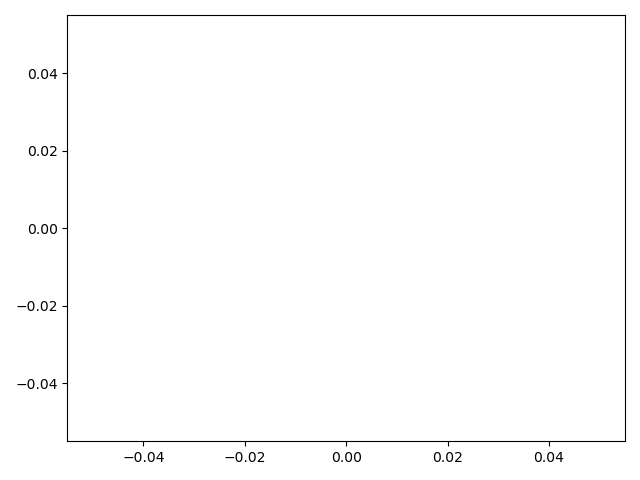

In [82]:
px = []
py = []
points = []
n=  0
for i in range (len(df[n*const+bias])):
    px.append(df[n*const + bias][i])
    py.append(df[n*const + bias+1][i])
    points.append([df[n*const + bias][i],df[n*const + bias+1][i]])

ani= anima(points, max(px), max(py))
plt.tight_layout()
plt.show(ani)



In [83]:
#%matplotlib notebook
%matplotlib widget

def dfanime(df):
    fig, ax = plt.subplots(1,1)
    sc = ax.scatter([],[], label='Points')
    ax.set_xlim(0, 1024)
    ax.set_ylim(0, 1024)

    def animate(i):
        # Get the point from the points list at index i
        # Plot that point using the x and y coordinates
        point = [(df[i*const + bias][j], df[i*const + bias+1][j]) for j in range(len(df[i*const + bias]))]
        sc.set_offsets(point)

        #sc.scatter(px[:i], py[:i])
        return sc,
    ani = FuncAnimation(fig, func=animate, frames=len(df)//const, interval=500, repeat=False)
    return ani

In [ ]:
ani= dfanime(df)
plt.tight_layout()
plt.show(ani)